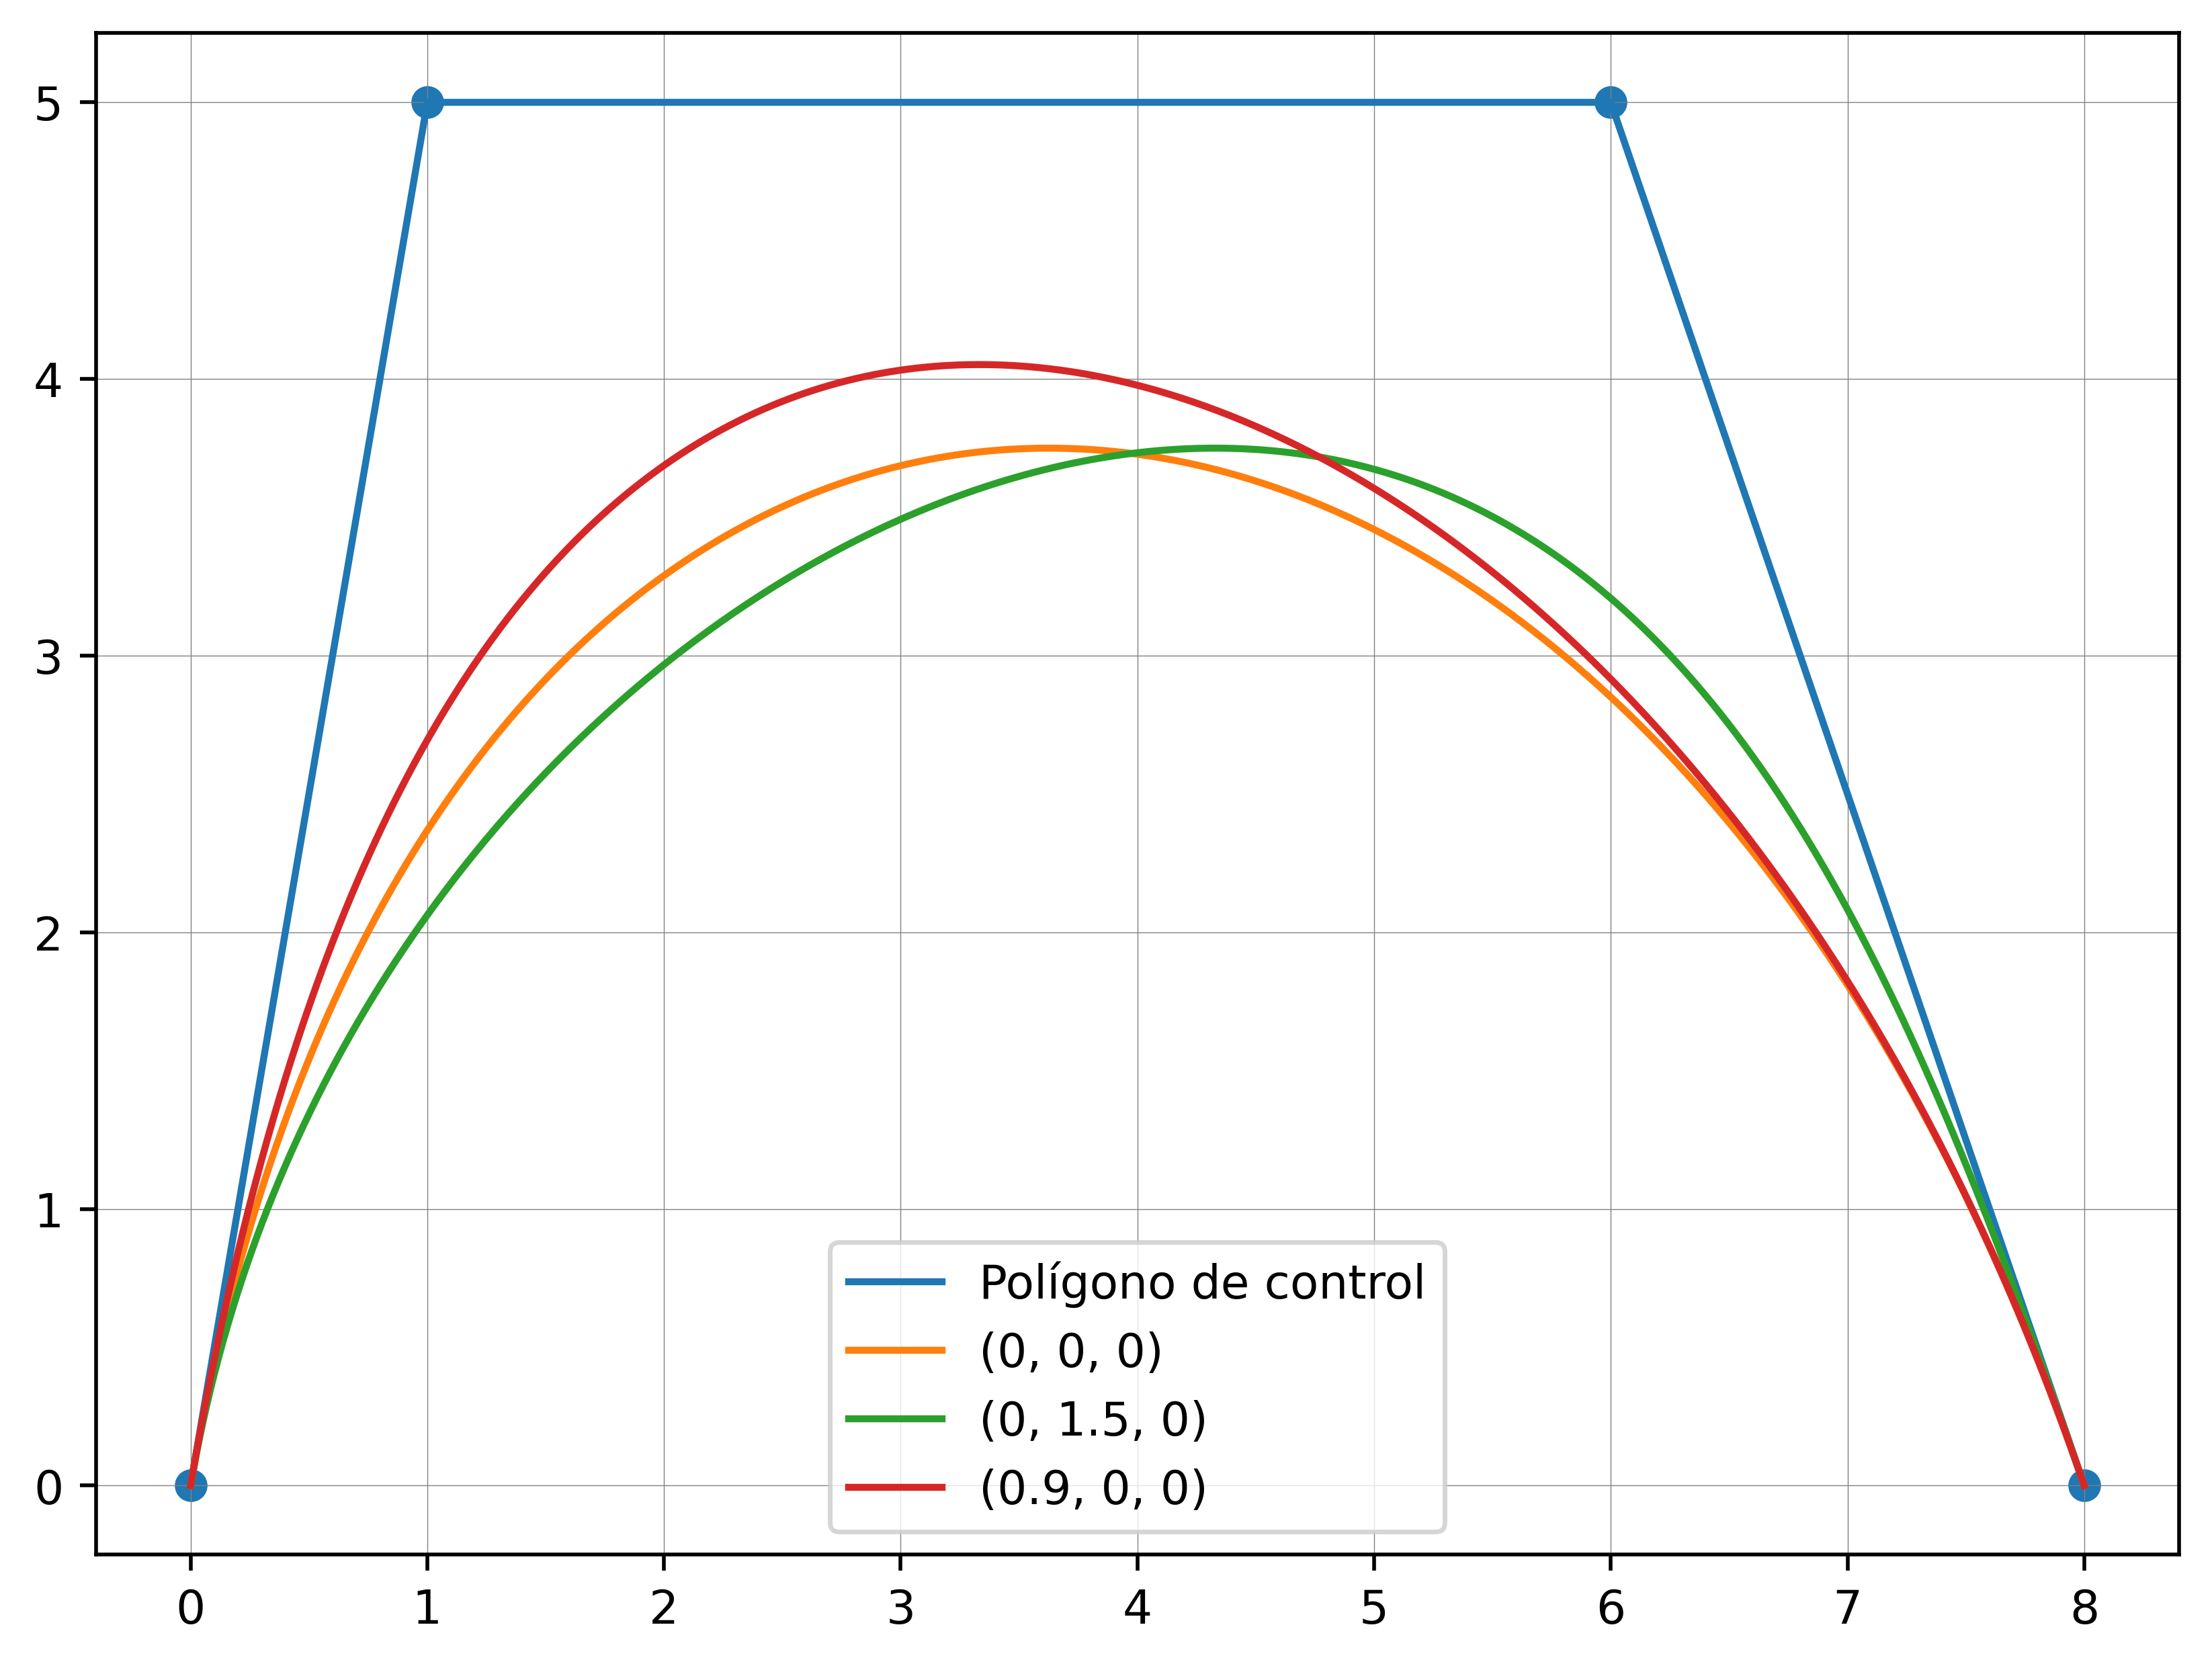

In [43]:
import scipy.special
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(8, 6), dpi=500)

def Bernstein(i, n, t):
    return scipy.special.binom(n, i)*((1-t)**(n-i))*(t**i)

def hat_Bernstein(i,n,t, a_i, a_j):
    """
    a_i, a_j: consecutive parameters
    """
    
    classical_bernstein = Bernstein(i,n,t)
    
    xi_1 =  a_i / (n-i+1)
    xi_2 = -a_j / (i+1)
    
    return classical_bernstein*(1 + xi_1*(1-t) + xi_2*t)

def getCurve(a):
    a = np.insert(a, 0, 0)
    a = np.insert(a, len(a), 0)
    Bezier_x = np.array([])
    Bezier_y = np.array([])
    t = np.linspace(0.0, 1, 1000)
    for t_0 in t:
        sum_x = 0
        sum_y = 0
        for i in range(0,n+1): # De 0 a 3
            
            a_i = a[i]
            a_j = a[i+1]
                
            B = hat_Bernstein(i,n,t_0, a_i,a_j)
            sum_x += (B*Px[i])
            sum_y += (B*Py[i])
        Bezier_x = np.insert(Bezier_x,len(Bezier_x) , sum_x)
        Bezier_y = np.insert(Bezier_y,len(Bezier_y) , sum_y)

    return Bezier_x, Bezier_y


#Points (0,0), (1, 5), (6, 5), (11, 0)
n = 3
Px = np.array([0, 1, 6, 8])
Py = np.array([0, 5, 5, 0])

#-----CURVA 1
a_1 = np.array([0,0,0])
c1_x = np.array([])
c1_y = np.array([])
c1_x, c1_y = getCurve(a_1)

#-----CURVA 2
a_2 = np.array([0,1.5,0])
c2_x = np.array([])
c2_y = np.array([])
c2_x, c2_y = getCurve(a_2)

#-----CURVA 3
a_3 = np.array([0.9,0,0])
c3_x = np.array([])
c3_y = np.array([])
c3_x, c3_y = getCurve(a_3)

plt.plot(Px, Py, label = 'Polígono de control')
plt.scatter(Px, Py)

plt.plot(c1_x, c1_y, label = '(0, 0, 0)')
plt.plot(c2_x, c2_y, label = '(0, 1.5, 0)')
plt.plot(c3_x, c3_y, label = '(0.9, 0, 0)')
plt.legend()
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()


# Generalized Fractional Bézier Curves

$$ B_{i,n}(t) = \binom{n}{i}(1-D_t^{-v}(t))^{n-i}D_t^{-v}(t)^i $$
Nueva base de funciones:
$$ \hat{B}(v,t,a_1,...,a_n) = B_{i,n}(t)(1 + \frac{a_i}{n-i+1}(1-D_t^{-v}(t)) - \frac{a_{i+1}}{i+1}D_t^{-v}(t))  $$

Curva de Bezier fraccional generalizada:
$$ \alpha(v,t,a_1,...,a_n) = \sum_{i=0}^n \hat{B}(v,t,a_1,...,a_n)P_i $$
con $P_i\in R^m , i=0,...,n$ puntos de control

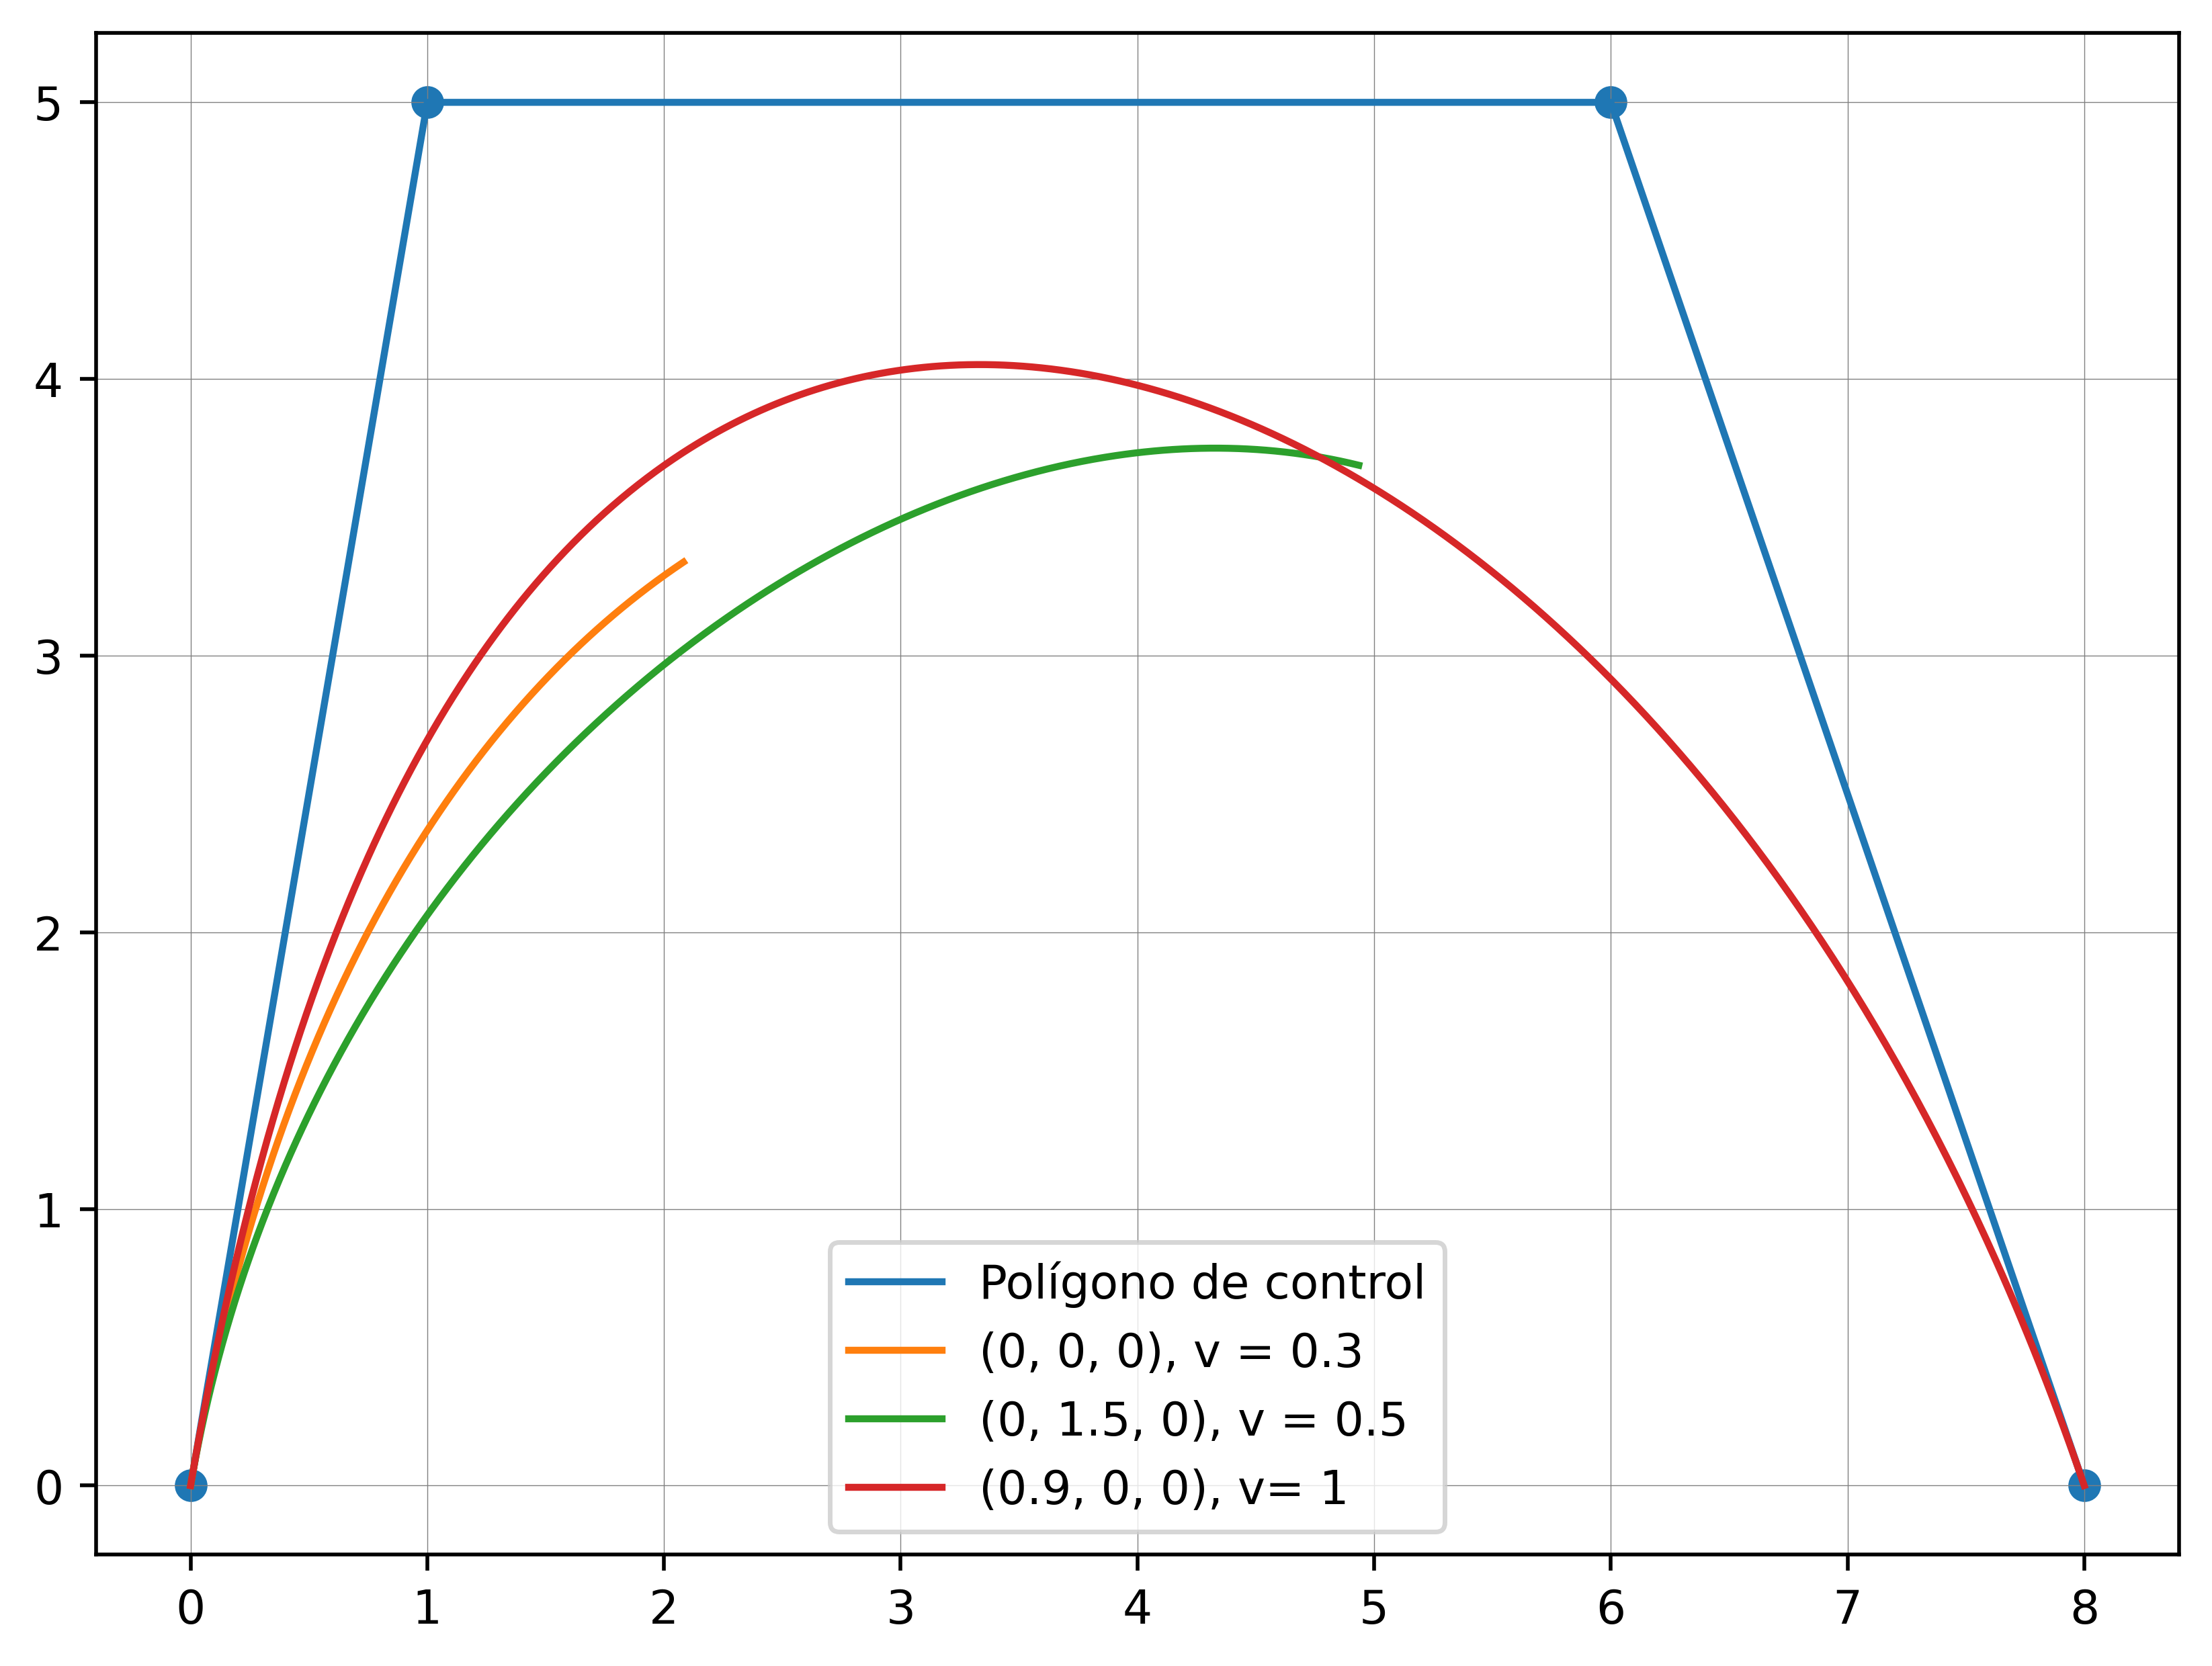

In [6]:
import scipy.special
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(8, 6), dpi=500)

def Dv(v,t):
    return (t**(v+1))/scipy.special.gamma(v)

def Bernstein(i, n, v, t):
    return scipy.special.binom(n, i)*((1-(Dv(v,t)))**(n-i))*((Dv(v,t))**i)

def hat_Bernstein(i,n, v, t, a_i, a_j):
    """
    a_i, a_j: consecutive parameters
    """
    
    classical_bernstein = Bernstein(i,n,v,t)
    
    xi_1 =  a_i / (n-i+1)
    xi_2 = -a_j / (i+1)
    
    return classical_bernstein*(1 + xi_1*(1-Dv(v,t)) + xi_2*Dv(v,t))

def getCurve(a, v):
    a = np.insert(a, 0, 0)
    a = np.insert(a, len(a), 0)
    Bezier_x = np.array([])
    Bezier_y = np.array([])
    t = np.linspace(0.0, 1, 1000)
    for t_0 in t:
        sum_x = 0
        sum_y = 0
        for i in range(0,n+1): # De 0 a 3
            
            a_i = a[i]
            a_j = a[i+1]
                
            B = hat_Bernstein(i,n,v,t_0, a_i,a_j)
            sum_x += (B*Px[i])
            sum_y += (B*Py[i])
        Bezier_x = np.insert(Bezier_x,len(Bezier_x) , sum_x)
        Bezier_y = np.insert(Bezier_y,len(Bezier_y) , sum_y)

    return Bezier_x, Bezier_y


#Points (0,0), (1, 5), (6, 5), (11, 0)
n = 3
Px = np.array([0, 1, 6, 8])
Py = np.array([0, 5, 5, 0])

#-----CURVA 1 v = 0.3
a_1 = np.array([0,0,0])
c1_x = np.array([])
c1_y = np.array([])
c1_x, c1_y = getCurve(a_1, 0.3)

#-----CURVA 2 v = 0.5
a_2 = np.array([0,1.5,0])
c2_x = np.array([])
c2_y = np.array([])
c2_x, c2_y = getCurve(a_2, 0.5)

#-----CURVA 3 v = 1
a_3 = np.array([0.9,0,0])
c3_x = np.array([])
c3_y = np.array([])
c3_x, c3_y = getCurve(a_3, 1)

plt.plot(Px, Py, label = 'Polígono de control')
plt.scatter(Px, Py)

plt.plot(c1_x, c1_y, label = '(0, 0, 0), v = 0.3')
plt.plot(c2_x, c2_y, label = '(0, 1.5, 0), v = 0.5')
plt.plot(c3_x, c3_y, label = '(0.9, 0, 0), v= 1')
plt.legend()
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()